# 인공 신경망 (artificial neural network, ANN)

In [1]:
# 설치
# pip install tensorflow

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt             
import matplotlib as mpl                    
mpl.rc('font', family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus'] = False  

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras     # 텐서플로우와 케라스 동일 용어 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import load_model

from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import LambdaCallback
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

[Keras getting started](https://keras.io/getting_started/)

[User Guide](https://keras.io/guides/)

[API Reference](https://keras.io/api/)

[Examples](https://keras.io/examples/)

## XOR
* 단층 퍼셉트론 (Single-layer Perceptron) : 입력층 + 출력층
* 다층 퍼센트론 (Multi-layer Perceptron, MLP) : 입력층 + 은닉층 + 출력층
* 딥러닝 (Deep Learning) : 여러 은닉층을 가진 딥 신경망(Deep Neural Network) : 입력층 + n 은닉층 .....  + 출력층
* 인공 신경망 (Artificial Neural Network, ANN) : 단층 퍼셉트론, 다층 퍼센트론, 심층 신경망(딥러닝)

In [215]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
Y=np.array([[0], [1], [1], [0]])  

## 학습 절차
- MLP(다층퍼셉트론) 모델 >> 컴파일 >> 학습
- MLP(다층퍼셉트론) 모델 
  - 입력층 >> 은닉층 >> 출력층
- 컴파일
  - 경사하강법 >> 비용함수 >> 정확도
- 학습
  - 학습횟수 

In [230]:
# MLP 모델
model=keras.Sequential()    
model.add(keras.layers.Input(shape=(2,)))  
model.add(keras.layers.Dense(10, activation='relu'))      
model.add(keras.layers.Dense(1, activation='sigmoid'))     # 다중분류 softmax, 회귀 model.add(keras.layers.Dense(1))  
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

- 첫번째 Dense 레이어
    - 입력차원 : 2 
    - 뉴런수 : 10
    - 가중치 수 : (2 * 10) = 20 + 10(바이어스) = 30 
- 두번째 Dense 레이어
    - 뉴런수 : 1
    - 가중치 수 : 10 * 1(출력) + 1(바이어스) =  11

In [237]:
# CASE-1) 
model.compile(optimizer='sgd',                # learning_rate=0.01 / default
              loss='binary_crossentropy',     #  비용함수 : 이진 binary_crossentropy, 다중분류 categorical_crossentropy, 회귀 mean_squared_error, 
              metrics=['accuracy'])           #  정확도 : 분류 accuracy, 회귀 MSE, MAE, RMSE

model.fit(X, Y, epochs=10)                    #  학습횟수 (401*10=4,010)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.7122
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5000 - loss: 0.7119
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7500 - loss: 0.7115
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7500 - loss: 0.7110
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7500 - loss: 0.7106
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7500 - loss: 0.7102
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7500 - loss: 0.7098
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7500 - loss: 0.7094
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7500 - loss: 0.7090
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7500 - loss: 0.7086


- 평가 : 정확도, 예측

In [239]:
# 정확도
model.evaluate(X, Y)                          

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7500 - loss: 0.7082


[0.7081732749938965, 0.75]

In [241]:
# 예측 : XOR - 00 0 / 01 1 / 10 1 / 11 0
test=np.array([[1, 0]])
pred=model.predict(test)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


array([[0.5222232]], dtype=float32)

### CASE - 2

In [275]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
Y=np.array([[0], [1], [1], [0]])  

In [277]:
# CASE-2)  
sgd=SGD(learning_rate=0.05)                        
model.compile(optimizer=sgd,          
              loss='binary_crossentropy',          # categorical_crossentropy, mean_squared_error
              metrics=['accuracy'])                # MSE, MAE, RMSE

# model.fit(X, Y, epochs=100)  

In [279]:
epochs=100                # 401*100=41,000

for epoch in range(epochs):
    model.fit(X, Y, verbose=0)              # verbose=0 출력 없음, default 1    
    if(epoch + 1) % 10 == 0:                # 10 에폭마다 손실과 정확도 출력
        loss, accuracy=model.evaluate(X, Y)
        print(f"Epoch{epoch + 1}, Loss:{loss:.2f}, Accuracy:{accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 1.0000 - loss: 0.2378
Epoch10, Loss:0.24, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.2300
Epoch20, Loss:0.23, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.2226
Epoch30, Loss:0.22, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.2156
Epoch40, Loss:0.22, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.2090
Epoch50, Loss:0.21, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.2024
Epoch60, Loss:0.20, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.1961
Epoch70, Loss:0.20, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.1895
Epoch80, Loss:0.19, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.1834
Epoch90, Loss:0.18, Accuracy:1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accu

- 평가 : 정확도, 예측

In [282]:
# 정확도
model.evaluate(X, Y)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.1778


[0.1777830421924591, 1.0]

In [284]:
# 예측 : XOR - 00 0 / 01 1 / 10 1 / 11 0
new_data=np.array([[1, 0]])
pred=model.predict(new_data)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[0.8909342]], dtype=float32)

## 패션 MINST 데이터 셋
* 0 ~ 9
* 흑백 28 * 28
* 학습 데이터 60,000
* 테스트 데이터 10,000
* 데이터셋 : https://www.tensorflow.org/tutorials/keras/classification?hl=ko

### Seed 값 설정
- 실행할 때마다 같은 결과를 얻기 위해
- 머신러닝 모델은 데이터의 초기화, 가중치 설정, 데이터 샘플링 등에 난수(random number)를 사용
- Seed(시드)를 고정하면 항상 동일한 난수 값이 생성 

In [81]:
np.random.seed(42)        # 데이터 샘플링, 랜덤 분할 등에서 난수를 고정
tf.random.set_seed(42)    # 가중치 초기화, 데이터 증강, 샘플링 등에서 난수를 고정 

### 데이터 로드 및 분할

In [84]:
(X_train, Y_train), (X_test, Y_test)=keras.datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


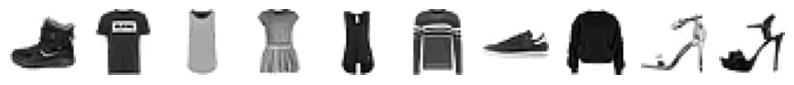

In [86]:
fig, ax=plt.subplots(1, 10, figsize=(10, 10))      # 전체그림객체(Figure), 객체배열(Axes)    

for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray_r')       # 컬러맵 흑백
    ax[i].axis('off')                             # x축, y축, 눈금, 라벨, 테투리 숨김
plt.show()

In [85]:
for i in range(10):
    print(Y_train[i], end=' ')            # 목표 값(정답) 출력

9 0 0 3 0 2 7 2 5 5 

In [87]:
np.unique(Y_train, return_counts=True)     # 각 고유값, 등장 횟수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

* 딥러닝 절차
  - 데이터 셋 분할 : 훈련, 검증, 테스트 데이터 
  - 딥러닝 모델 : 입력/은닉/출력, 옵티마이저설정(SGD...등), 손실함수(분류/회귀), 정확도(분류/회귀)
  - 모델 학습 : 학습횟수, Bacth
  - 평가 : 테스트 데이터

### 전처리 
* 정규화  0 ~ 1
* 1 차원 변경 
* 데이터 셋 분할 >> 훈련, 검증, 테스트 데이터 

In [90]:
# 학습 데이터
# 입력값이 너무 크거나 작으면 학습이 비효율적 (특정 범위(예: 0~1)로 변환하는 과정) 
X_train_scaled=X_train / 255.0
X_train_scaled.shape                                 #  (60000, 28, 28)
X_train_scaled=X_train_scaled.reshape(-1, 28 * 28)   # 1 차원 입력
print(X_train_scaled.shape)

# 테스트 데이터
X_test_scaled=X_test / 255.0
X_test_scaled=X_test_scaled.reshape(-1, 28 * 28)
print(X_test_scaled.shape)

(60000, 784)
(10000, 784)


### 모델 구성 - 학습
- MLP(다층퍼셉트론) 모델 >> 컴파일 >> 학습 

In [93]:
# 1) MLP 모델
model=keras.Sequential()
model.add(keras.layers.Input(shape=(784, )))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
#  2)컴파일 
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # 스파스 캐터고리컬 크로스엔트로피
              metrics=['accuracy'])    

In [98]:
# 3)학습
history=model.fit(X_train_scaled, 
                  Y_train, 
                  epochs=5, 
                  validation_split=0.2)   # 훈련 데이터에서 일부를 검증 데이터로 자동으로 분리
                                          # validation_data=(X_val_scaled, Y_val)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6505 - loss: 1.0838 - val_accuracy: 0.8071 - val_loss: 0.5762
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8151 - loss: 0.5531 - val_accuracy: 0.8270 - val_loss: 0.5066
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8330 - loss: 0.4923 - val_accuracy: 0.8359 - val_loss: 0.4755
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8423 - loss: 0.4624 - val_accuracy: 0.8418 - val_loss: 0.4564
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8488 - loss: 0.4428 - val_accuracy: 0.8465 - val_loss: 0.4423


### 평가

In [101]:
# 정확도
model.evaluate(X_test_scaled, Y_test)    # loss, val_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8418 - loss: 0.4586


[0.46723392605781555, 0.8374999761581421]

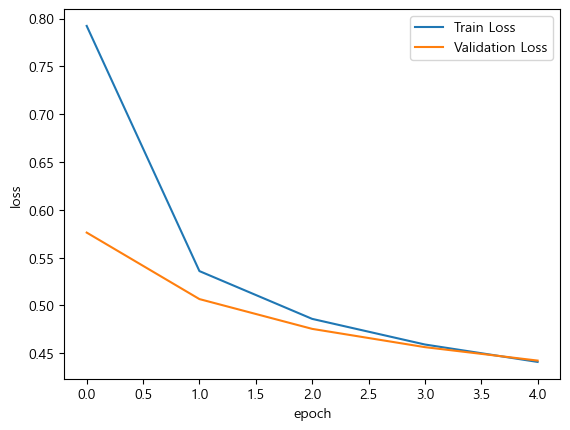

In [103]:
# 그래프 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 예측 

In [105]:
pred_prob=model.predict(X_test_scaled)
pred_prob  # 각 행의 값

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.48418819e-05, 7.10248241e-06, 7.92797582e-05, ...,
        2.84248382e-01, 4.05913079e-03, 6.01409018e-01],
       [6.61263548e-05, 3.15153966e-06, 9.59199488e-01, ...,
        3.97717692e-10, 8.52269368e-05, 1.14778125e-08],
       [5.18890884e-05, 9.99825180e-01, 1.50543301e-05, ...,
        1.06146683e-06, 2.27281157e-06, 1.76285884e-08],
       ...,
       [4.58075218e-02, 5.21167603e-05, 4.25229920e-03, ...,
        4.10475797e-04, 7.70256460e-01, 8.24999006e-05],
       [8.23739174e-05, 9.95962441e-01, 7.49290921e-05, ...,
        1.77153761e-05, 5.71003056e-06, 2.10369326e-05],
       [5.76120685e-04, 4.90519393e-04, 1.76137139e-03, ...,
        2.32931510e-01, 1.97407454e-02, 1.59536898e-02]], dtype=float32)

In [107]:
pred=np.argmax(pred_prob, axis=1)
# pred

pred[0]

9

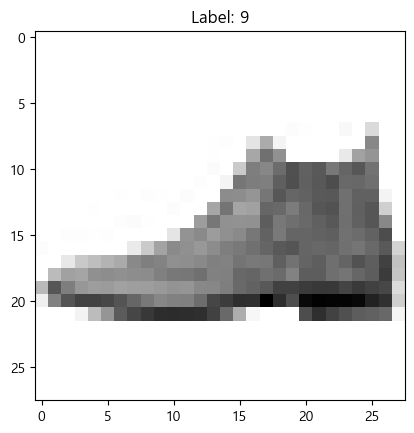

In [109]:
plt.imshow(X_test_scaled[0].reshape(28, 28), cmap='gray_r')  # 그림
plt.title(f'Label: {pred[0]}')   # 예측 값
plt.show()

In [111]:
print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.72      0.76      0.74      1000
           3       0.80      0.88      0.84      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.91      0.92      1000
           6       0.62      0.57      0.59      1000
           7       0.88      0.94      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### 모델 저장 & 불러오기

In [114]:
# 저장
model.save('./Deep_result/fminst.keras')    

In [116]:
# 불러오기
model_fminst_load=load_model('./Deep_result/fminst.keras')
model_fminst_load.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,512 (310.60 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [118]:
# 모델 학습 및 평가 

## 보스톤 집값 예측 
- 506 * 14
- 특성
   - CRIM – 인구 1인당 범죄율
   - ZN – 25,000 평방피트 이상 주택 비율(%)
   - INDUS – 비소매 상업지역 비율(%)
   - CHAS – 찰스강 인접 여부 (1: 인접, 0: 인접X)
   - NOX – 일산화질소 농도(ppm)
   - RM – 평균 방 개수
   - AGE – 1940년 이전 지어진 주택 비율(%)
   - DIS – 직업 중심지까지의 거리(가중 평균)
   - RAD – 방사형 고속도로 접근성 지수
   - TAX – 재산세율 (10,000달러당)
   - PTRATIO – 학생-교사 비율
   - B – 흑인 비율 지수(1000(0.63 - 흑인 비율)^2)
   - LSTAT – 저소득층 비율(%)
- 타겟 값: 주택 가격(MEDV, 단위: 1,000달러) / 예) 0.5는 30,500달러를 의미

In [131]:
np.random.seed(42)
tf.random.set_seed(42)

### 데이터 분할 및 전처리
- 다른 파일 : house=pd.read_csv('./Data/housing.csv', sep='\\s+', header=None)   # 공백으로 구분, 컬럼명 없음

In [134]:
house=pd.read_csv('./Data/boston.csv')
# house.shape
# house.head()
# house.info()
# house.isnull().sum()

In [136]:
X=house.drop('MEDV', axis=1)
Y=house['MEDV']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [138]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [140]:
X_train.shape
X_train.shape[1]

13

### 모델 구성 - 학습
- MLP 모델 >> 컴파일 >> 학습 

In [143]:
# 1) MLP(다층퍼셉트론) 모델
model=keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1], )))  # 506, 13 / 506 자동으로 처리

model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.3))         #  30% 삭제 / 노드 수가 많은 은닉층 뒤에 배치하는 것이 효과

model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
# 2) 모델 컴파일
model.compile(optimizer='adam',                # learning_rate=0.01 / default / Adam(learning_rate=0.0002)
              loss='mean_squared_error',      
              metrics=['mse'])                

#### CallBack 함수

In [148]:
# 3-1) 
# 20 epoch마다 진행 상황 출력
def on_epoch_end_fun(epoch, logs):  
    if(epoch + 1) % 20 == 0:
        # print(f"Epoch {epoch+1}: loss={logs['loss']:.4f}, mse={logs['mse']:.4f}")
        print(f"Epoch {epoch+1}: loss={logs['loss']:.4f}, mse={logs['mse']:.4f}", 
              f"val_loss={logs['val_loss']:.4f}, val_mse={logs['val_loss']:.4f}")

# 각 에포크가 끝날 때 on_epoch_end 함수
print_callback=LambdaCallback(on_epoch_end=on_epoch_end_fun)

# 학습 중단
early_stopping_callback=EarlyStopping(monitor='val_loss',       # 검증 손실(val_loss)을 모니터링
                                      patience=20,             # 100 epoch 동안 개선이 없으면 학습 중단
                                      verbose=1,                # early stopping 메시지 출력  
                                      restore_best_weights=True)   # 가장 좋은 가중치 복원 

In [150]:
# 3) 학습
history=model.fit(X_train, 
                  Y_train, 
                  epochs=200, 
                  batch_size=10, 
                  validation_split=0.2, 
                  verbose=0,                #  콜백 함수 시 작성, verbose=0 출력 안함 / default 1
                  callbacks=[print_callback, early_stopping_callback])

Epoch 20: loss=27.2666, mse=27.2666 val_loss=25.8978, val_mse=25.8978
Epoch 40: loss=18.9442, mse=18.9442 val_loss=24.4598, val_mse=24.4598
Epoch 60: loss=16.9729, mse=16.9729 val_loss=22.3163, val_mse=22.3163
Epoch 80: loss=14.9466, mse=14.9466 val_loss=19.8054, val_mse=19.8054
Epoch 100: loss=13.1404, mse=13.1404 val_loss=17.6113, val_mse=17.6113
Epoch 120: loss=11.7268, mse=11.7268 val_loss=15.9724, val_mse=15.9724
Epoch 140: loss=10.7563, mse=10.7563 val_loss=14.6126, val_mse=14.6126
Epoch 160: loss=9.9377, mse=9.9377 val_loss=13.6137, val_mse=13.6137
Epoch 180: loss=9.1442, mse=9.1442 val_loss=13.0221, val_mse=13.0221
Epoch 200: loss=8.5960, mse=8.5960 val_loss=12.4447, val_mse=12.4447


#### 평가 지표

In [153]:
pred=model.predict(X_test)
r2=metrics.r2_score(Y_test, pred)
r2

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


0.8343245696038499

In [155]:
mae=metrics.mean_absolute_error(Y_test, pred)
mse=metrics.mean_squared_error(Y_test, pred)
rmse=metrics.root_mean_squared_error(Y_test, pred)
mae, mse, rmse

(2.334423259192822, 12.149606087664447, 3.4856285068355244)